<a href="https://colab.research.google.com/github/zak-era12/Student-Performance/blob/main/Decision_Tree_on_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree for Classification**
Here we try to classify students into different groups 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data['Total_score']=data.iloc[:,5:].sum(axis=1)
print(data)

     gender race/ethnicity  ... writing score Total_score
0    female        group B  ...            74         218
1    female        group C  ...            88         247
2    female        group B  ...            93         278
3      male        group A  ...            44         148
4      male        group C  ...            75         229
..      ...            ...  ...           ...         ...
995  female        group E  ...            95         282
996    male        group C  ...            55         172
997  female        group C  ...            65         195
998  female        group D  ...            77         223
999  female        group D  ...            86         249

[1000 rows x 9 columns]


In [ ]:
data['Percentage']=(data['Total_score']/300)*100
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [ ]:
passmark = 40
plt.rcParams['figure.figsize']= (18,12)
data['status']=np.where(data['Percentage']< passmark ,'Fail', 'Pass')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total_score                  1000 non-null   int64  
 9   Percentage                   1000 non-null   float64
 10  status                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Percentage', 'status'],
      dtype='object')

In [ ]:
data=pd.get_dummies(data,columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','status'])
data

,math score,reading score,writing score,Total_score,Percentage,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,status_Fail,status_Pass
0,72,72,74,218,72.666667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1,69,90,88,247,82.333333,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
2,90,95,93,278,92.666667,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,47,57,44,148,49.333333,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,76,78,75,229,76.333333,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,94.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
996,62,55,55,172,57.333333,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
997,59,71,65,195,65.000000,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
998,68,78,77,223,74.333333,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1


In [ ]:
data.columns

Index(['math score', 'reading score', 'writing score', 'Total_score',
       'Percentage', 'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none', 'status_Fail', 'status_Pass'],
      dtype='object')

In [ ]:
data.rename(columns={"parental level of education_associate's degree":"parental level of education_associate",
                     "parental level of education_bachelor's degree":"parental level of education_bachelor",
                     "'parental level of education_master's degree":"'parental level of education_master"})

,math score,reading score,writing score,Total_score,Percentage,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate,parental level of education_bachelor,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,status_Fail,status_Pass
0,72,72,74,218,72.666667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1,69,90,88,247,82.333333,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
2,90,95,93,278,92.666667,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,47,57,44,148,49.333333,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,76,78,75,229,76.333333,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,94.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
996,62,55,55,172,57.333333,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
997,59,71,65,195,65.000000,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
998,68,78,77,223,74.333333,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1


In [ ]:
x=data.drop(['math score', 'reading score', 'writing score', 'Total_score',
       'Percentage','status_Pass','status_Fail'],axis=1)
y=data['status_Pass']


In [ ]:
x

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: status_Pass, Length: 1000, dtype: uint8

In [ ]:
feature_names=x.columns
labels=str(y.unique())


5

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                 test_size = 0.2)

In [ ]:
from sklearn import tree

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(criterion='entropy')

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(x_train,y_train)

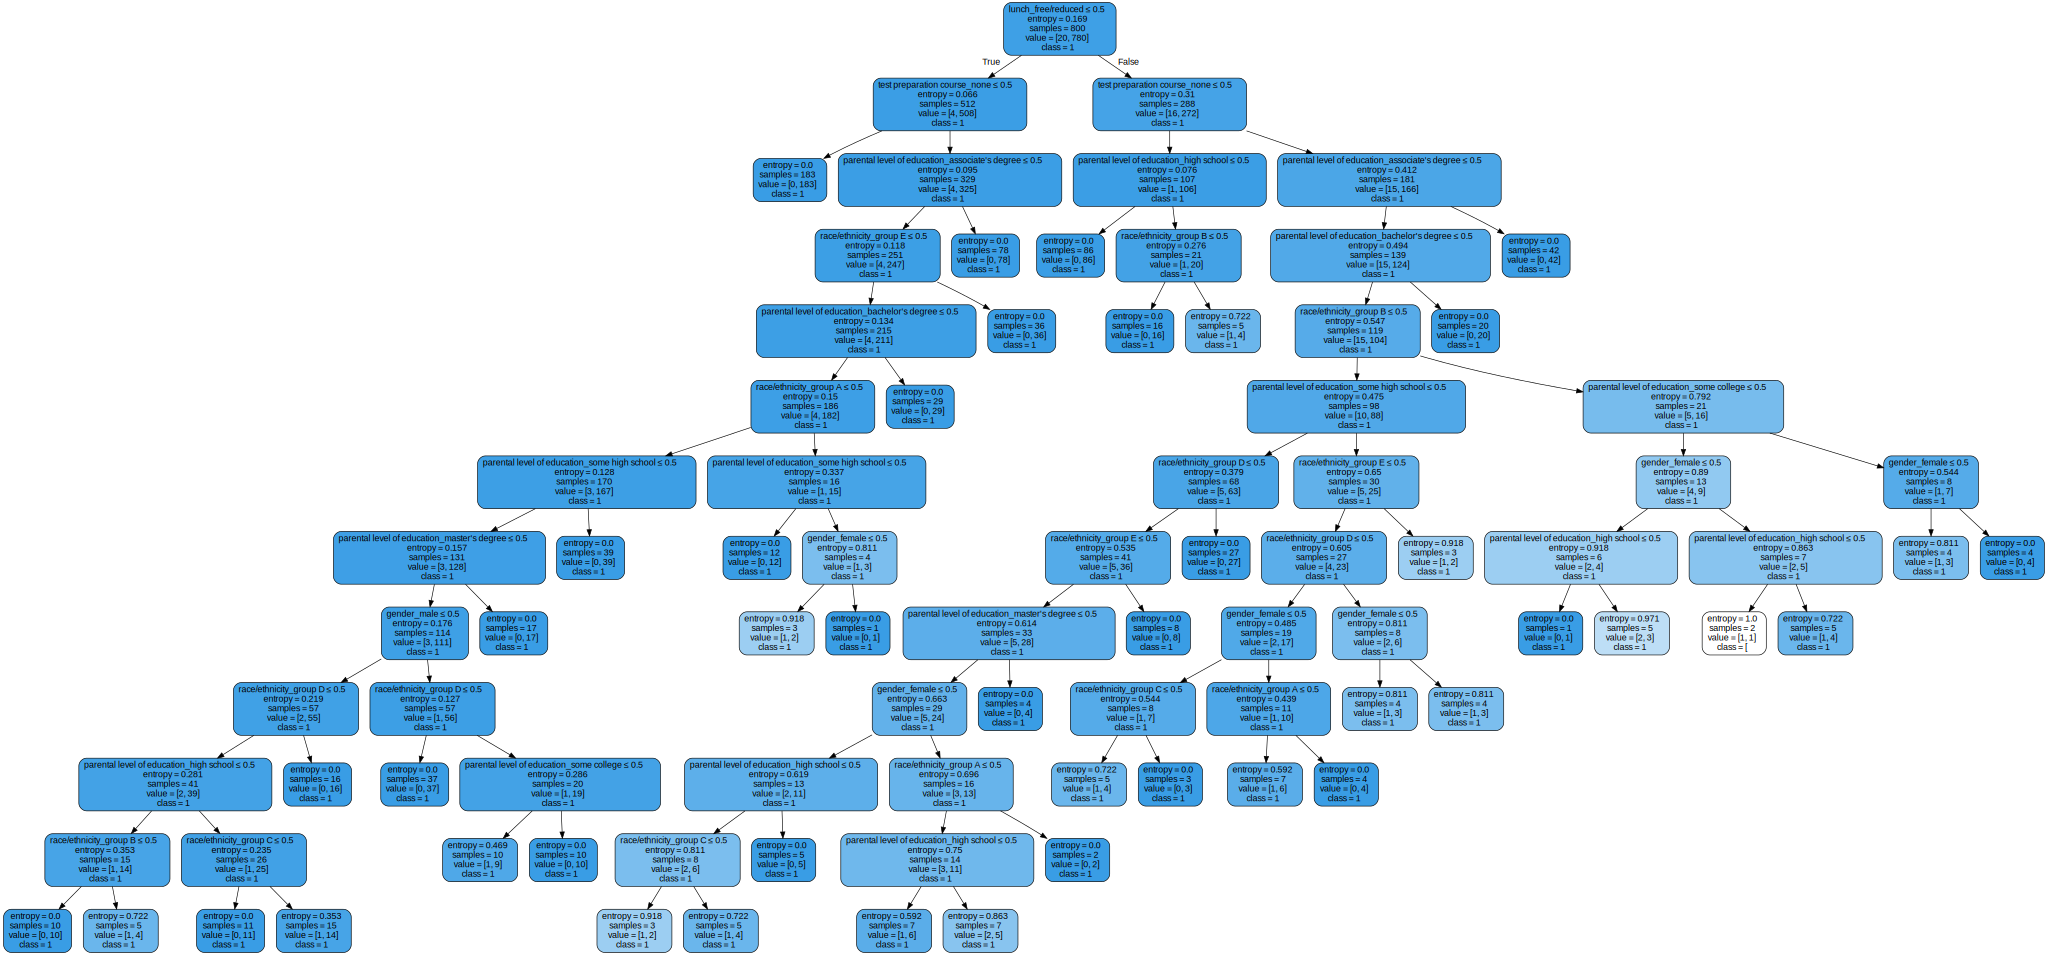

In [ ]:
#save tree
import graphviz 
dt_data=tree.export_graphviz(classification_tree,out_file=None, feature_names=x.columns, 
                             filled=True,class_names=labels,rounded=True,special_characters=True)
graph=graphviz.Source(dt_data,format='png')
graph

So this is the decision for this particular dataset which clearly shows how the algorithm has behaved. Here, the first split is based on the standard of lunch plan taken by the student.
This further supports the statement 'Good Body, Better Mind'

### Evaluating the Performance

We are interested in how this performs in terms of true positives (predicted true and actually true), false positives (predicted true but not actually true), false negatives (predicted false but actually true) and true negatives (predicted false and actually false).
One way to do so is to examine the results in a confusion matrix. A confusion matrix allows us to visualise how the predicted and true labels match up by showing predicted values on one axis and actual values on the other. This is useful to identify where we may get false positives or false negatives and hence how the algorithm has performed

In [ ]:
test_pred_decision_tree = classification_tree.predict(x_test)

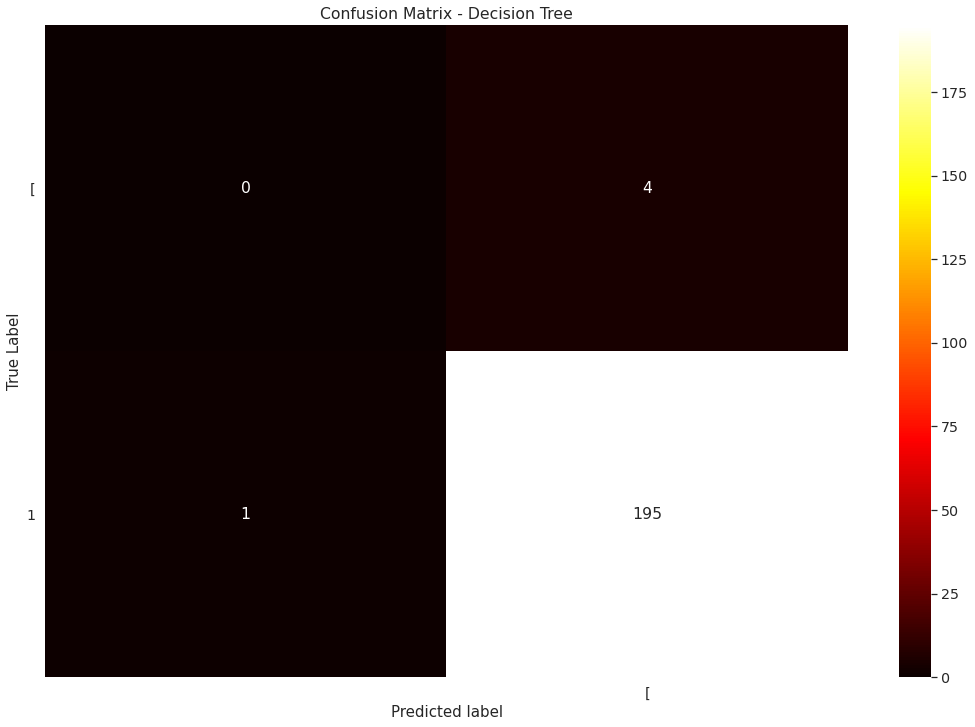

<Figure size 720x504 with 0 Axes>

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="hot")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()P")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

Accuracy<br>
The accuracy score is the fraction of true positives and true negatives over the total number of assigned labels and is calculated as:<br>
sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix)

In [ ]:
#Accuracy
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.95

Precision<br>
This tells us how many of the values we predicted to be in a certain class are actually in that class. Essentially, this tells us how we performed in terms of false positives. It is calculated as:<br>
True positive (number in diagonal)/All positives (column sum)

In [ ]:
#get the precision score
precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
0,0.500000
1,0.954545


Recall<Br>
This tells us how many of the values in each class were given the correct label, thus telling use how it performed relative to false negatives. It is calculated as:<br>
True positive (number in diagonal)/All assignments (row sum)

In [ ]:
recall = metrics.recall_score(y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
0,0.100000
1,0.994737


f1<br>
This is a weighted average of precision and recall scale, with 1 being the best and 0 the worst. This uses the harmonmic mean, so that the value is closer to the smaller number, and prevents overestimating the performance of the model in cases where one parameter is high and the other low. It is calculated as:<br>
2 * (precision * recall)/(precision + recall)

In [ ]:
f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1)

f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
0,0.166667
1,0.974227


In [ ]:
print(metrics.classification_report(y_test,
                                    test_pred_decision_tree))


              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.95      0.99      0.97       190

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200



In [ ]:
#extract importance
importance = pd.DataFrame({'feature': x_train.columns, 
'importance' : np.round(classification_tree.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                                           feature  importance
13                              lunch_free/reduced       0.178
16                    test preparation course_none       0.132
7   parental level of education_associate's degree       0.112
5                           race/ethnicity_group D       0.103
3                           race/ethnicity_group B       0.084
9          parental level of education_high school       0.080
12    parental level of education_some high school       0.068
8    parental level of education_bachelor's degree       0.065
6                           race/ethnicity_group E       0.044
2                           race/ethnicity_group A       0.030
11        parental level of education_some college       0.026
4                           race/ethnicity_group C       0.025
0                                    gender_female       0.025
10     parental level of education_master's degree       0.024
1                                      gender_male     

In [ ]:
# Improving the model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 1, 'min_samples_split': 2}

Grid scores on development set:
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 8}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 10}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 8}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 10}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 

In [ ]:
clf.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

The best estimator suggests to use the 'gini' index as the criterion instead of 'entropy'.



---



---



---



---

